In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm 


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
df = pd.read_csv("/content/train.csv")
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,...,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,...,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,...,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,G

In [4]:
t=(((df.isnull().sum()/df.isnull().count())*100))
s=sorted(t.items(),key=lambda x: x[1], reverse=True)
s


[('PoolQC', 99.52054794520548),
 ('MiscFeature', 96.30136986301369),
 ('Alley', 93.76712328767123),
 ('Fence', 80.75342465753424),
 ('FireplaceQu', 47.26027397260274),
 ('LotFrontage', 17.73972602739726),
 ('GarageType', 5.5479452054794525),
 ('GarageYrBlt', 5.5479452054794525),
 ('GarageFinish', 5.5479452054794525),
 ('GarageQual', 5.5479452054794525),
 ('GarageCond', 5.5479452054794525),
 ('BsmtExposure', 2.6027397260273974),
 ('BsmtFinType2', 2.6027397260273974),
 ('BsmtQual', 2.5342465753424657),
 ('BsmtCond', 2.5342465753424657),
 ('BsmtFinType1', 2.5342465753424657),
 ('MasVnrType', 0.547945205479452),
 ('MasVnrArea', 0.547945205479452),
 ('Electrical', 0.0684931506849315),
 ('Id', 0.0),
 ('MSSubClass', 0.0),
 ('MSZoning', 0.0),
 ('LotArea', 0.0),
 ('Street', 0.0),
 ('LotShape', 0.0),
 ('LandContour', 0.0),
 ('Utilities', 0.0),
 ('LotConfig', 0.0),
 ('LandSlope', 0.0),
 ('Neighborhood', 0.0),
 ('Condition1', 0.0),
 ('Condition2', 0.0),
 ('BldgType', 0.0),
 ('HouseStyle', 0.0),
 (

In [5]:
house_final = df[['MSZoning','LotArea','Neighborhood','BldgType','HouseStyle','OverallQual','YearBuilt','ExterQual','TotalBsmtSF',
                     'HeatingQC','FullBath','BedroomAbvGr','KitchenQual','GarageType','TotRmsAbvGrd','GarageArea','PoolArea','SalePrice']]
house_final

,MSZoning,LotArea,Neighborhood,BldgType,HouseStyle,OverallQual,YearBuilt,ExterQual,TotalBsmtSF,HeatingQC,FullBath,BedroomAbvGr,KitchenQual,GarageType,TotRmsAbvGrd,GarageArea,PoolArea,SalePrice
0,RL,8450,CollgCr,1Fam,2Story,7,2003,Gd,856,Ex,2,3,Gd,Attchd,8,548,0,208500
1,RL,9600,Veenker,1Fam,1Story,6,1976,TA,1262,Ex,2,3,TA,Attchd,6,460,0,181500
2,RL,11250,CollgCr,1Fam,2Story,7,2001,Gd,920,Ex,2,3,Gd,Attchd,6,608,0,223500
3,RL,9550,Crawfor,1Fam,2Story,7,1915,TA,756,Gd,1,3,Gd,Detchd,7,642,0,140000
4,RL,14260,NoRidge,1Fam,2Story,8,2000,Gd,1145,Ex,2,4,Gd,Attchd,9,836,0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,7917,Gilbert,1Fam,2Story,6,1999,TA,953,Ex,2,3,TA,Attchd,7,460,0,175000
1456,RL,13175,NWAmes,1Fam,1Story,6,1978,TA,1542,TA,2,3,TA,Attchd,7,500,0,210000
1457,RL,9042,Crawfor,1Fam,2Story,7,1941,Ex,1152,Ex,2,4,Gd,Attchd,9,252,0,266500
1458,RL,9717,NAmes,1Fam,1Story,5,1950,TA,1078,Gd,1,2,Gd,Attchd,5,240,0,142125


In [6]:
 categorical=['MSZoning','Neighborhood','BldgType','HouseStyle','ExterQual','HeatingQC','KitchenQual','GarageType','OverallQual','TotRmsAbvGrd','FullBath','BedroomAbvGr']
 numerical=["LotArea",'YearBuilt','TotalBsmtSF','GarageArea','PoolArea']

In [7]:
(house_final.isnull().sum()/house_final.isnull().count())*100

MSZoning        0.000000
LotArea         0.000000
Neighborhood    0.000000
BldgType        0.000000
HouseStyle      0.000000
OverallQual     0.000000
YearBuilt       0.000000
ExterQual       0.000000
TotalBsmtSF     0.000000
HeatingQC       0.000000
FullBath        0.000000
BedroomAbvGr    0.000000
KitchenQual     0.000000
GarageType      5.547945
TotRmsAbvGrd    0.000000
GarageArea      0.000000
PoolArea        0.000000
SalePrice       0.000000
dtype: float64

In [8]:
house_final.GarageType.value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [9]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(strategy = 'most_frequent', fill_value = 'string')
house_final['GarageType'] = si.fit_transform(np.array(house_final.GarageType).reshape(-1,1))
house_final.isnull().sum()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


MSZoning        0
LotArea         0
Neighborhood    0
BldgType        0
HouseStyle      0
OverallQual     0
YearBuilt       0
ExterQual       0
TotalBsmtSF     0
HeatingQC       0
FullBath        0
BedroomAbvGr    0
KitchenQual     0
GarageType      0
TotRmsAbvGrd    0
GarageArea      0
PoolArea        0
SalePrice       0
dtype: int64

TOTALBSMTSF:TOTAL BASEMENT SQUAREFEET 

In [10]:
for i in numerical:
  print({i:house_final[i].corr(house_final.SalePrice)})

{'LotArea': 0.2638433538714056}
{'YearBuilt': 0.5228973328794969}
{'TotalBsmtSF': 0.6135805515591956}
{'GarageArea': 0.6234314389183618}
{'PoolArea': 0.09240354949187321}


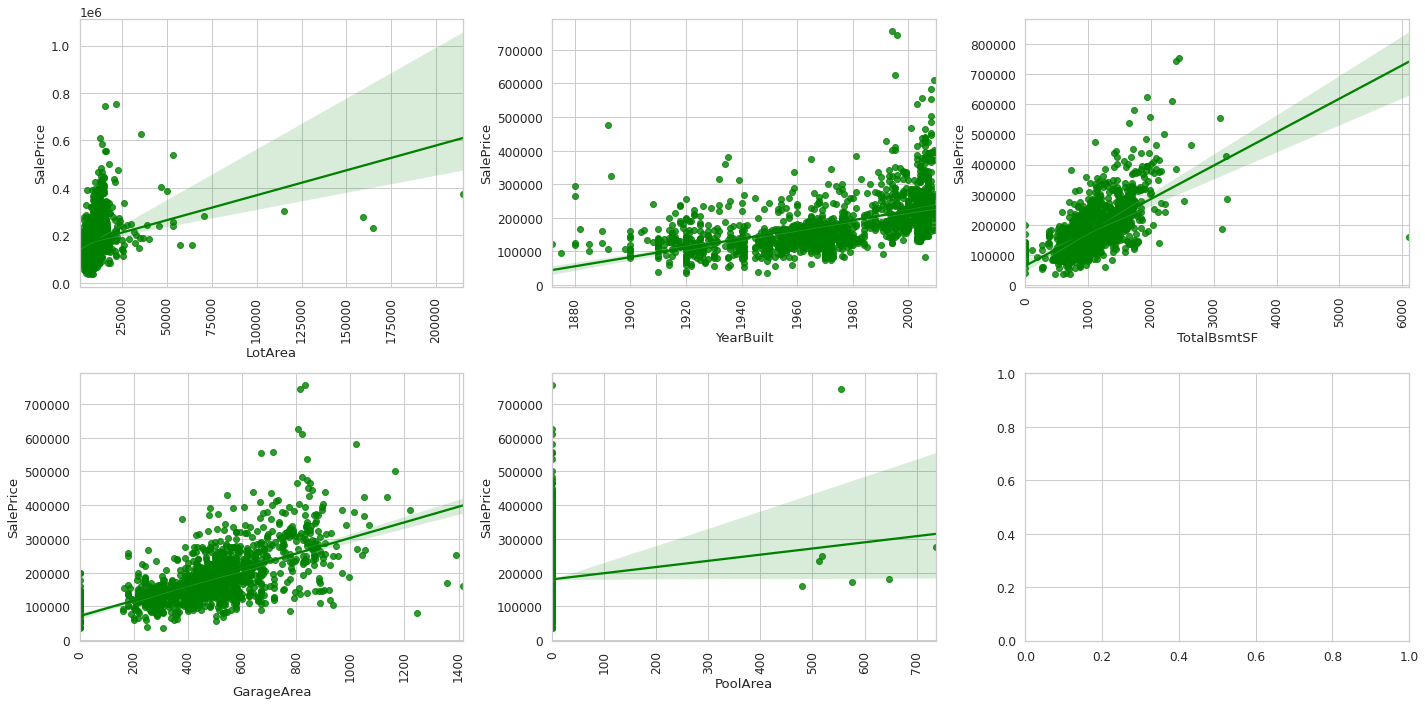

In [12]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
fig, ax = plt.subplots(2, 3, figsize=(20, 10))
for variable, subplot in zip(numerical, ax.flatten()):
    sns.regplot(x=variable,y=house_final['SalePrice'],data=house_final,ax=subplot,color='green')
    #sm.qqplot(data_points, line ='45',ax=subplot) 
    for label in subplot.get_xticklabels():
        label.set_rotation(90)
fig.tight_layout() 

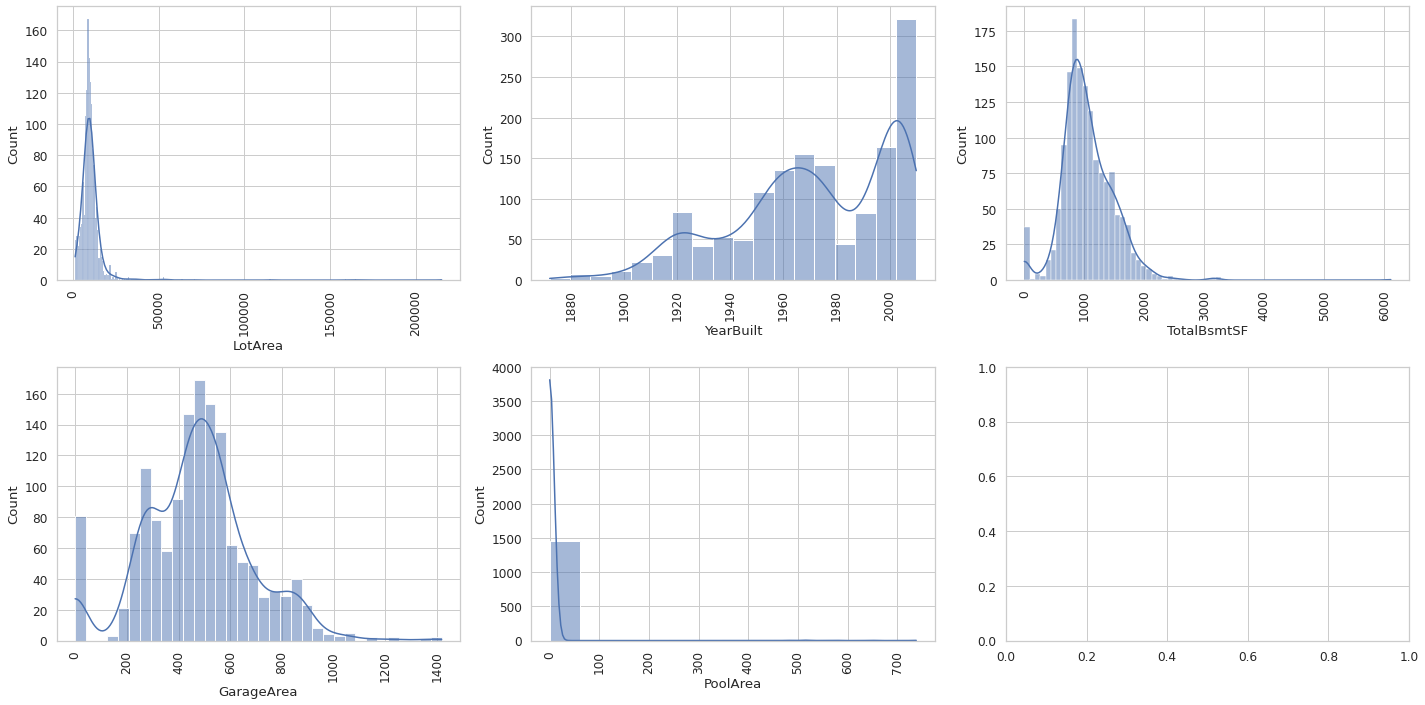

In [13]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
fig, ax = plt.subplots(2, 3, figsize=(20, 10))
for variable, subplot in zip(numerical, ax.flatten()):
    sns.histplot(x=house_final[variable],ax=subplot,kde=True)
    #sm.qqplot(data_points, line ='45',ax=subplot) 
    for label in subplot.get_xticklabels():
        label.set_rotation(90)
fig.tight_layout() 

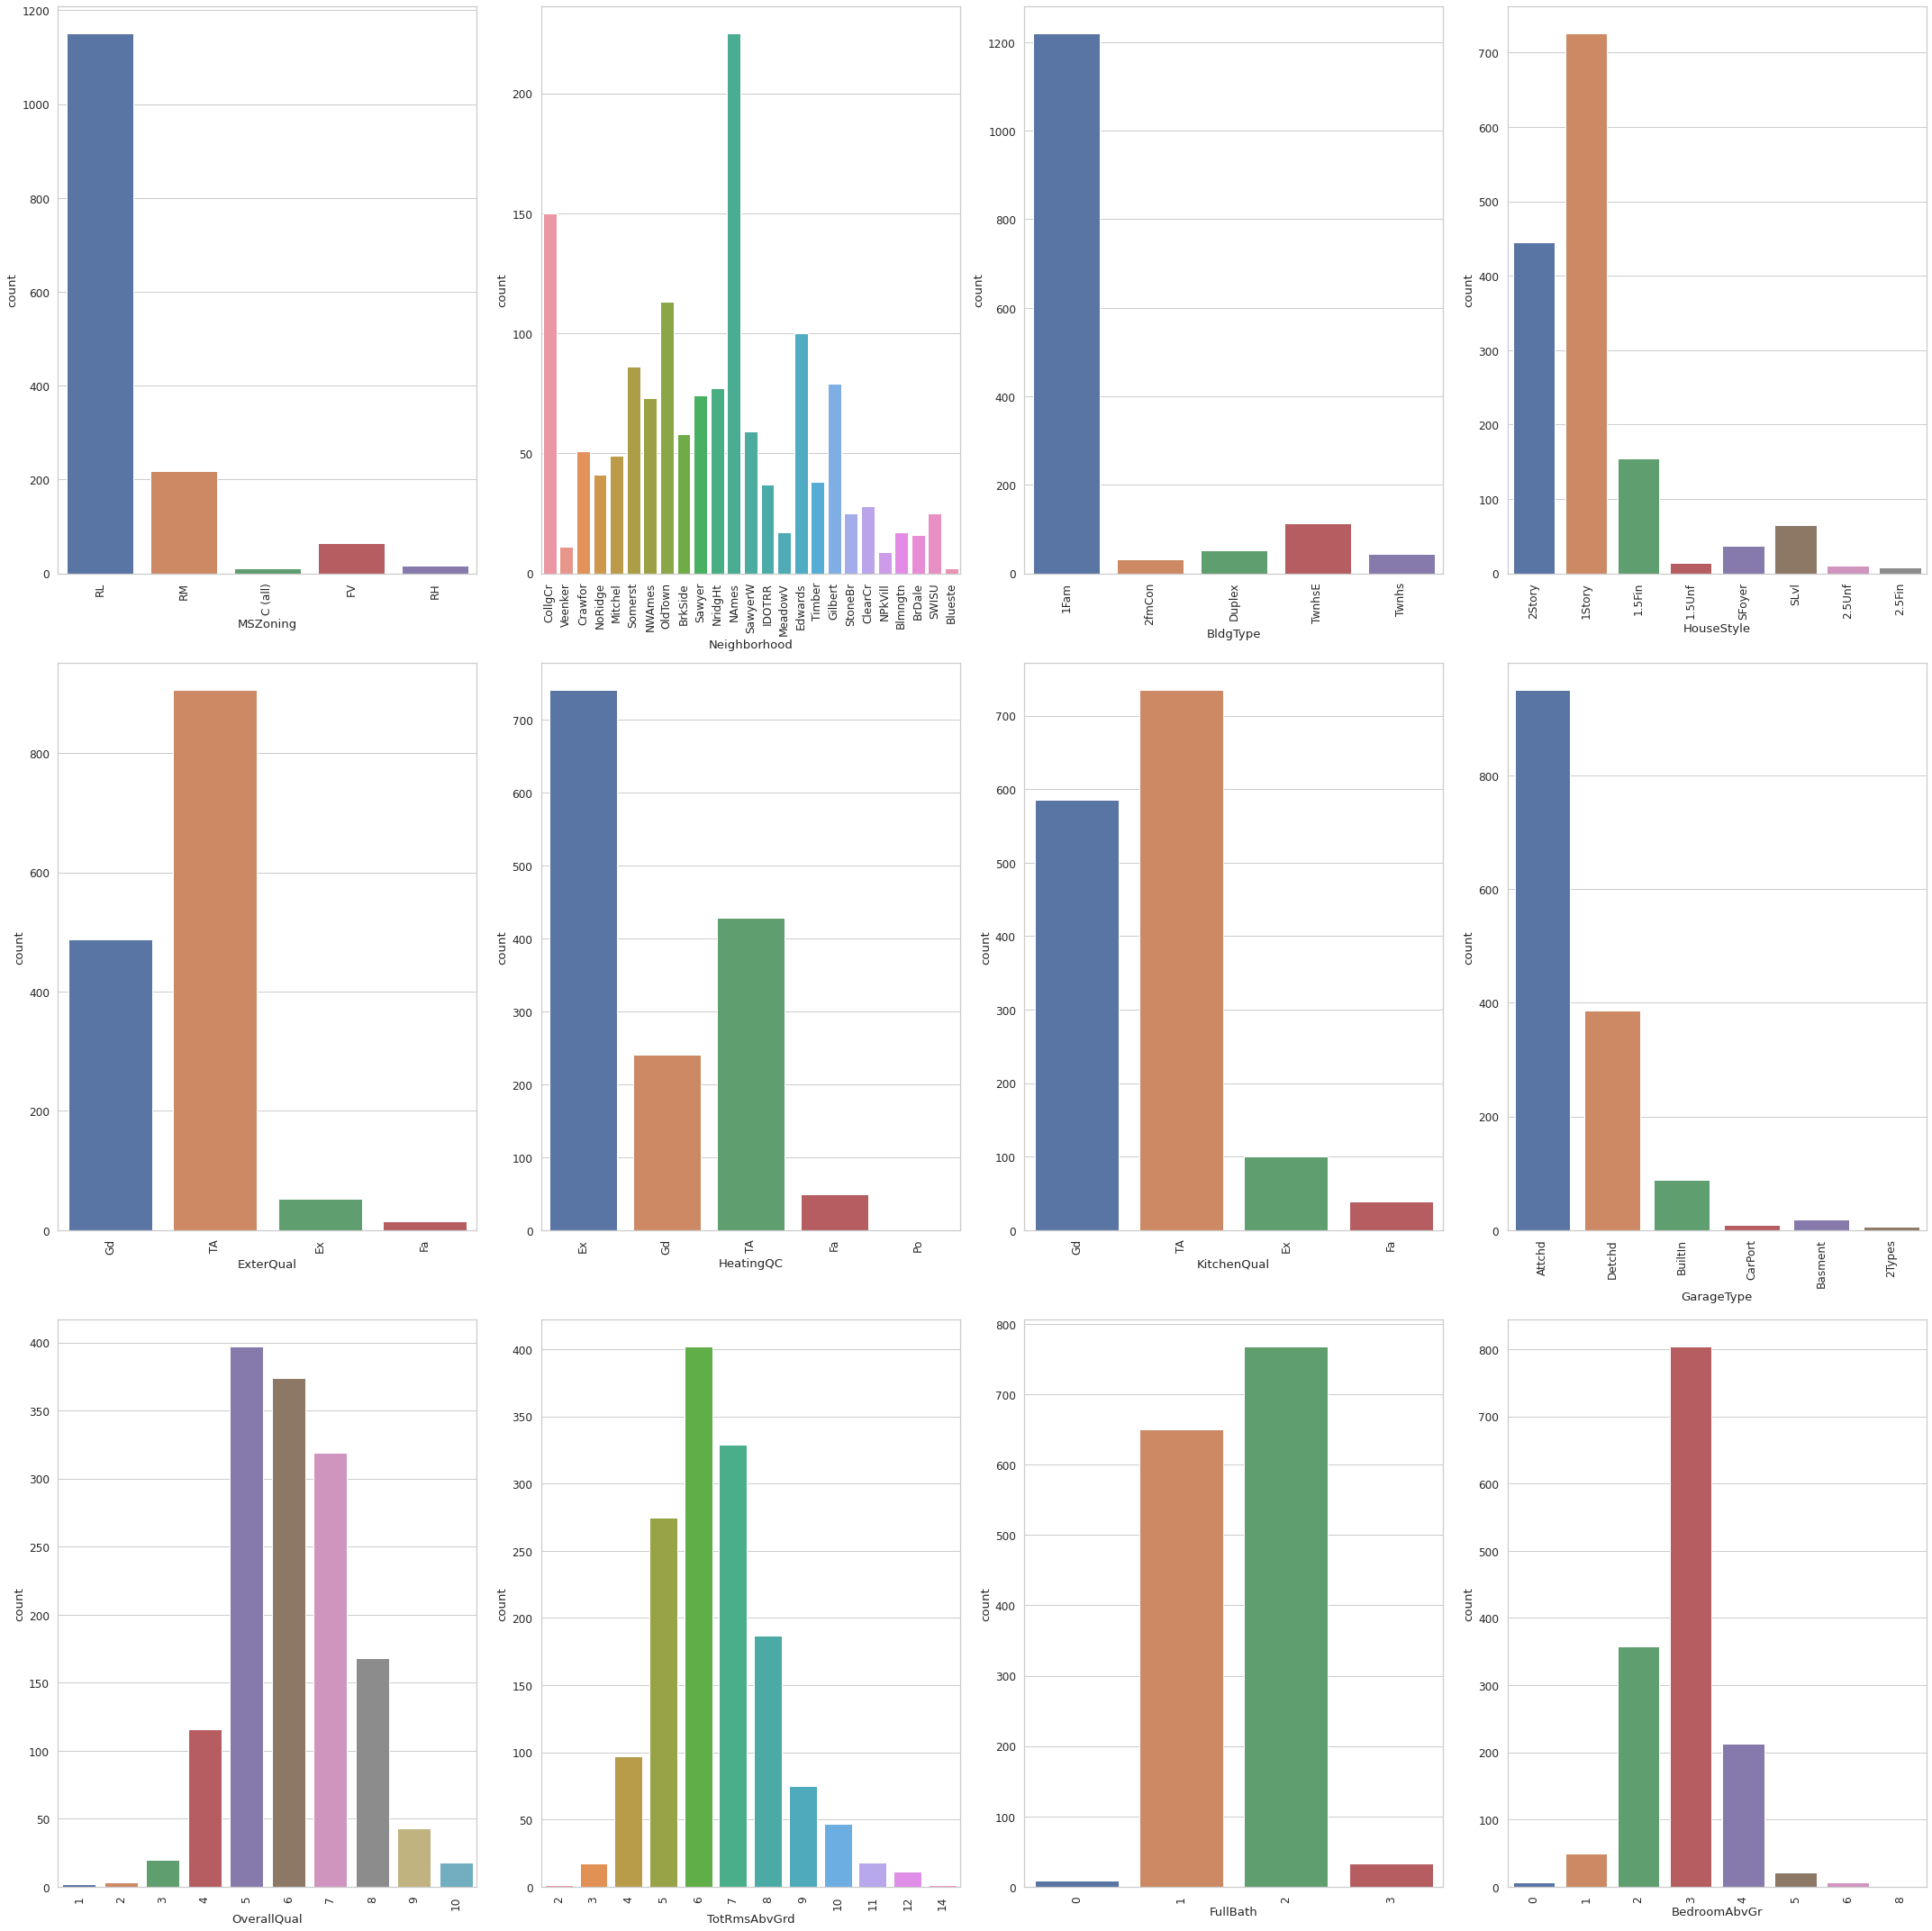

In [14]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
fig, ax = plt.subplots(3, 4, figsize=(30, 30))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(x=variable,data=house_final,ax=subplot)
    #sm.qqplot(data_points, line ='45',ax=subplot) 
    for label in subplot.get_xticklabels():
        label.set_rotation(90)
fig.tight_layout() 

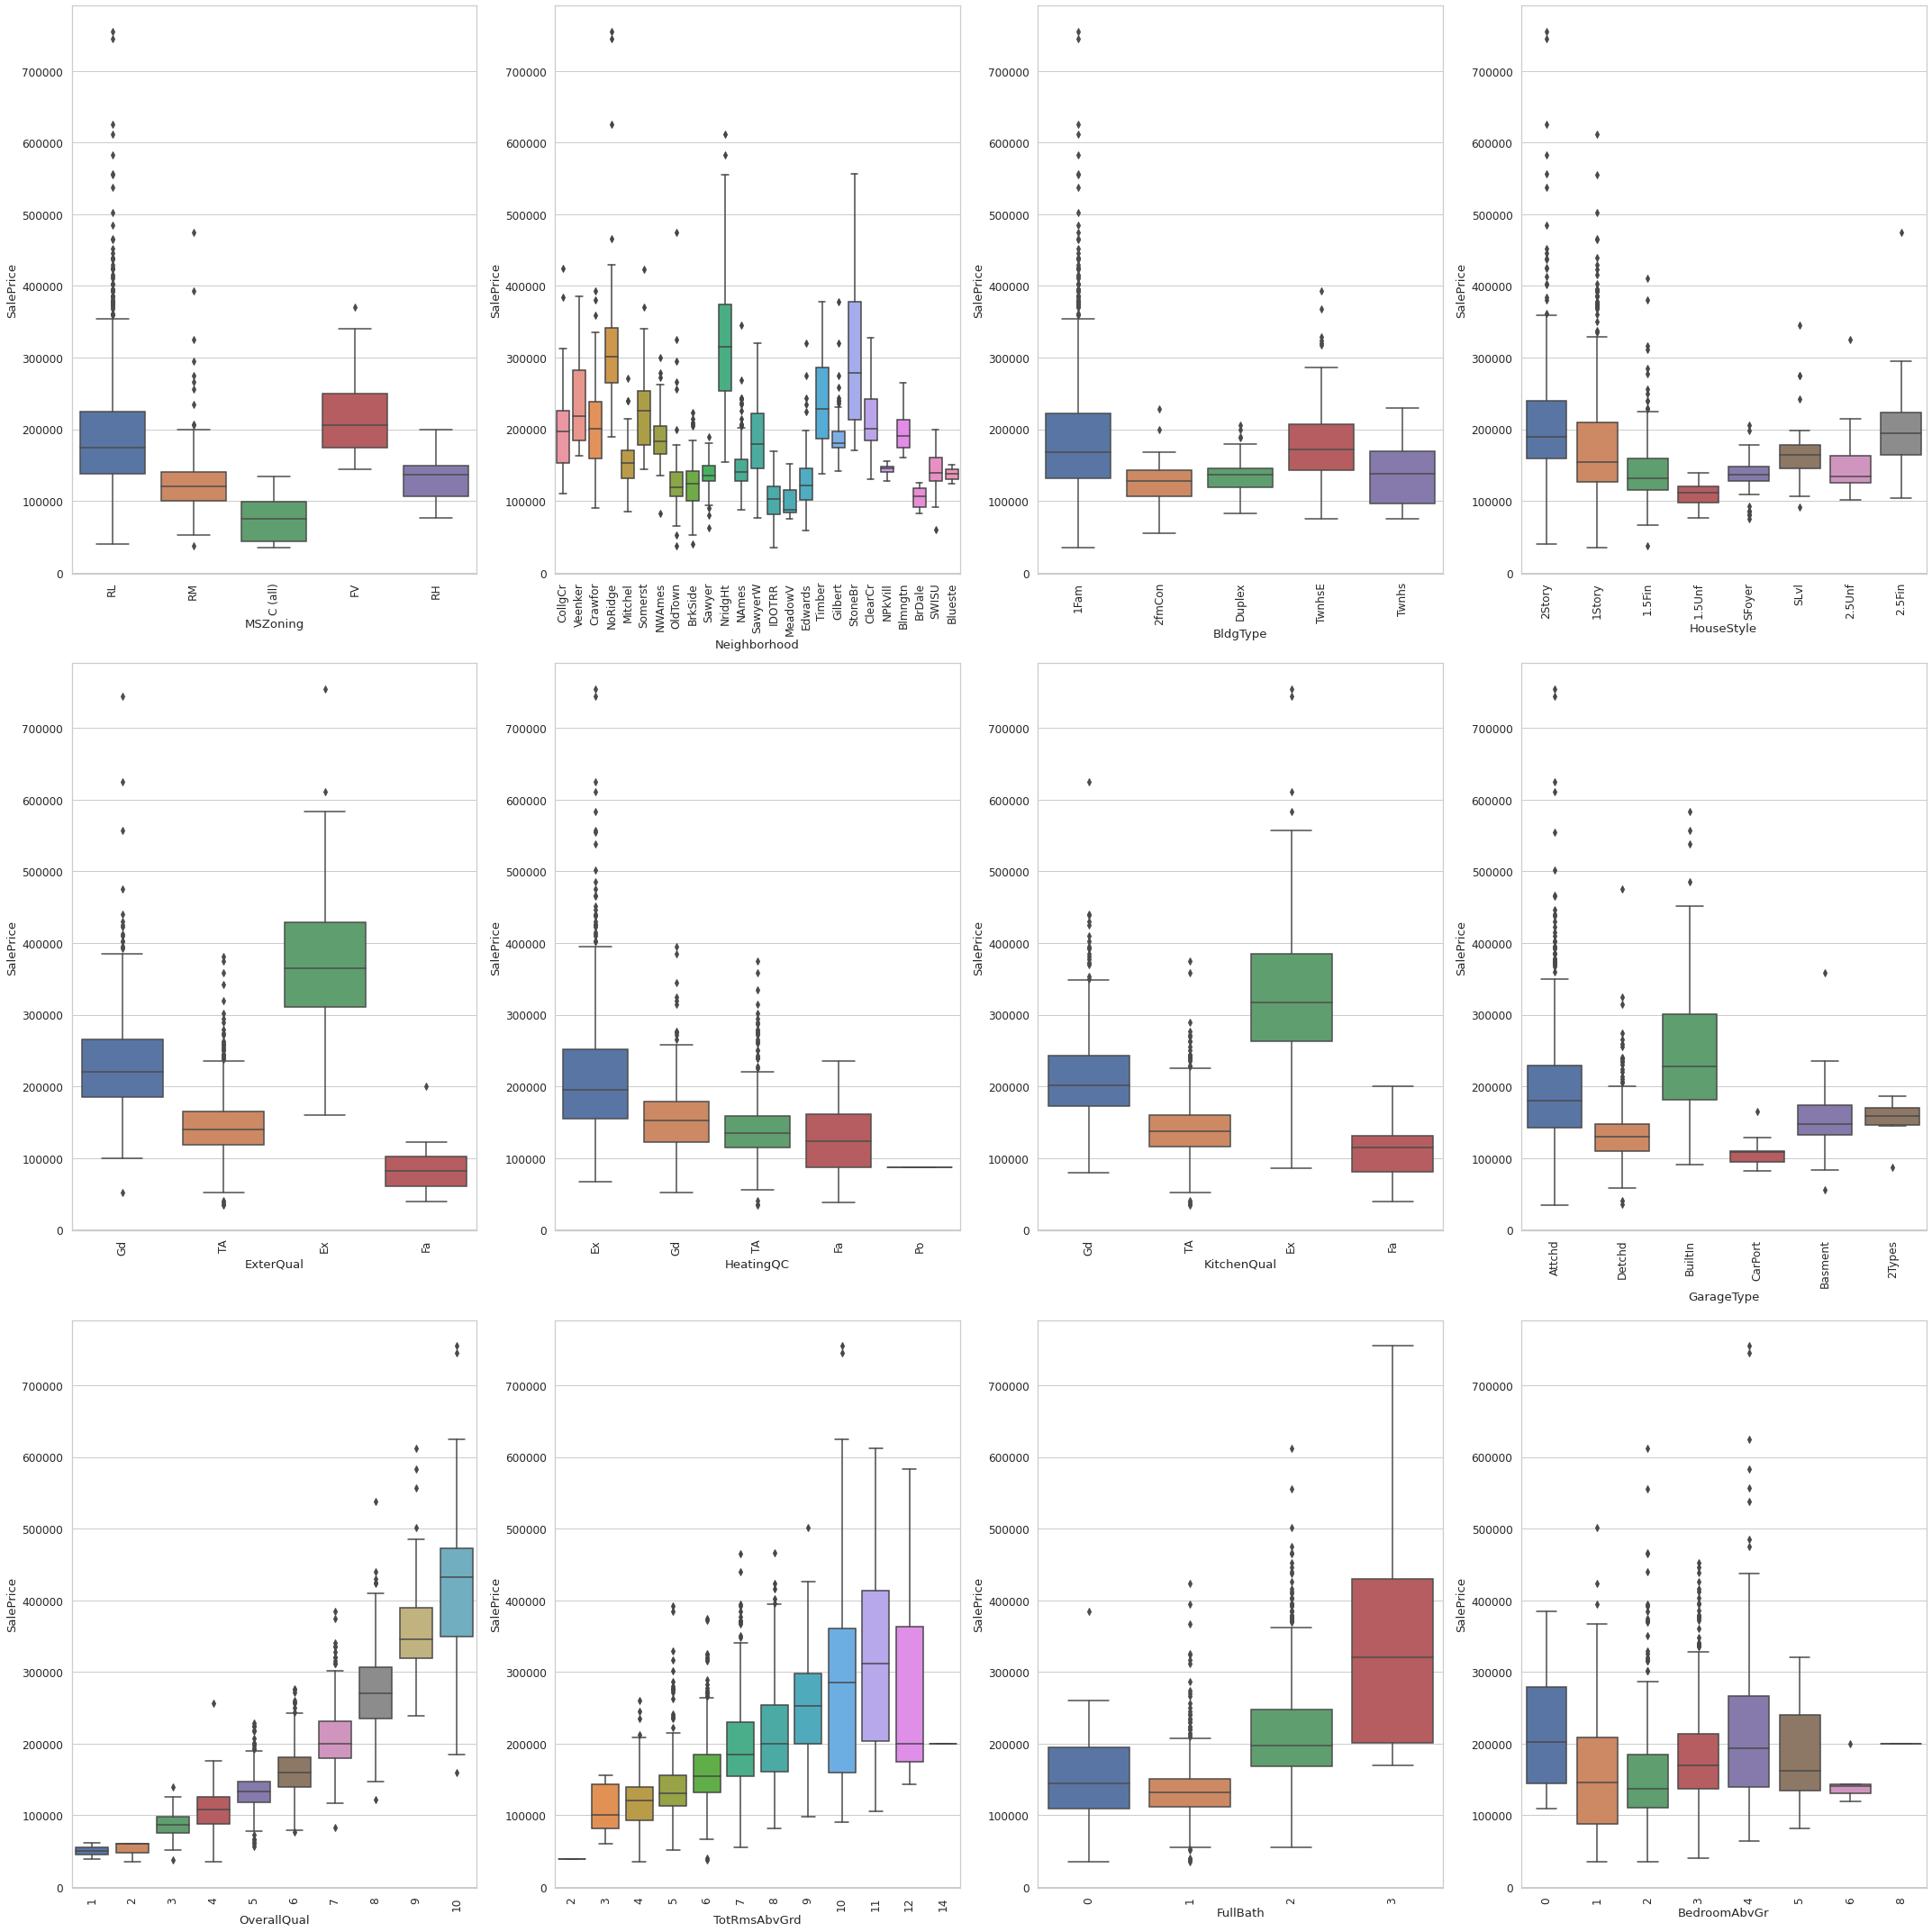

In [15]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
fig, ax = plt.subplots(3, 4, figsize=(30, 30))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.boxplot(x=variable,y='SalePrice',data=house_final,ax=subplot)
    #sm.qqplot(data_points, line ='45',ax=subplot) 
    for label in subplot.get_xticklabels():
        label.set_rotation(90)
fig.tight_layout() 

In [16]:
  from sklearn.preprocessing import LabelEncoder
  le = LabelEncoder()
  for i in house_final.columns:
    if i in ['MSZoning','Neighborhood','BldgType','HouseStyle','ExterQual','HeatingQC','KitchenQual','GarageType']:
      house_final[i] = le.fit_transform(house_final[i])
  house_final

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,MSZoning,LotArea,Neighborhood,BldgType,HouseStyle,OverallQual,YearBuilt,ExterQual,TotalBsmtSF,HeatingQC,FullBath,BedroomAbvGr,KitchenQual,GarageType,TotRmsAbvGrd,GarageArea,PoolArea,SalePrice
0,3,8450,5,0,5,7,2003,2,856,0,2,3,2,1,8,548,0,208500
1,3,9600,24,0,2,6,1976,3,1262,0,2,3,3,1,6,460,0,181500
2,3,11250,5,0,5,7,2001,2,920,0,2,3,2,1,6,608,0,223500
3,3,9550,6,0,5,7,1915,3,756,2,1,3,2,5,7,642,0,140000
4,3,14260,15,0,5,8,2000,2,1145,0,2,4,2,1,9,836,0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,3,7917,8,0,5,6,1999,3,953,0,2,3,3,1,7,460,0,175000
1456,3,13175,14,0,2,6,1978,3,1542,4,2,3,3,1,7,500,0,210000
1457,3,9042,6,0,5,7,1941,0,1152,0,2,4,2,1,9,252,0,266500
1458,3,9717,12,0,2,5,1950,3,1078,2,1,2,2,1,5,240,0,142125


In [17]:
house_final['TotalArea'] = house_final.LotArea + house_final.GarageArea + house_final.PoolArea + house_final.TotalBsmtSF
house_final['Rooms'] = house_final.FullBath + house_final.BedroomAbvGr + house_final.TotRmsAbvGrd
house_final['Quality'] = house_final.OverallQual.astype(int) + house_final.ExterQual.astype(int) + house_final.KitchenQual.astype(int)
house_final


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,MSZoning,LotArea,Neighborhood,BldgType,HouseStyle,OverallQual,YearBuilt,ExterQual,TotalBsmtSF,HeatingQC,FullBath,BedroomAbvGr,KitchenQual,GarageType,TotRmsAbvGrd,GarageArea,PoolArea,SalePrice,TotalArea,Rooms,Quality
0,3,8450,5,0,5,7,2003,2,856,0,2,3,2,1,8,548,0,208500,9854,13,11
1,3,9600,24,0,2,6,1976,3,1262,0,2,3,3,1,6,460,0,181500,11322,11,12
2,3,11250,5,0,5,7,2001,2,920,0,2,3,2,1,6,608,0,223500,12778,11,11
3,3,9550,6,0,5,7,1915,3,756,2,1,3,2,5,7,642,0,140000,10948,11,12
4,3,14260,15,0,5,8,2000,2,1145,0,2,4,2,1,9,836,0,250000,16241,15,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,3,7917,8,0,5,6,1999,3,953,0,2,3,3,1,7,460,0,175000,9330,12,12
1456,3,13175,14,0,2,6,1978,3,1542,4,2,3,3,1,7,500,0,210000,15217,12,12
1457,3,9042,6,0,5,7,1941,0,1152,0,2,4,2,1,9,252,0,266500,10446,15,9
1458,3,9717,12,0,2,5,1950,3,1078,2,1,2,2,1,5,240,0,142125,11035,8,10


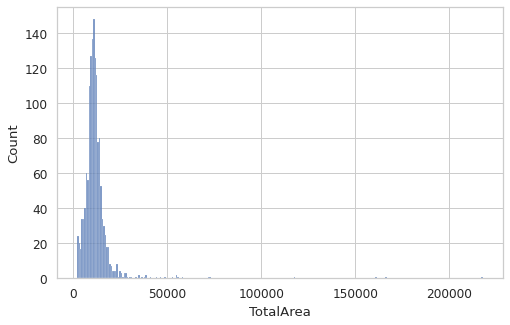

In [18]:
sns.histplot(house_final.TotalArea)

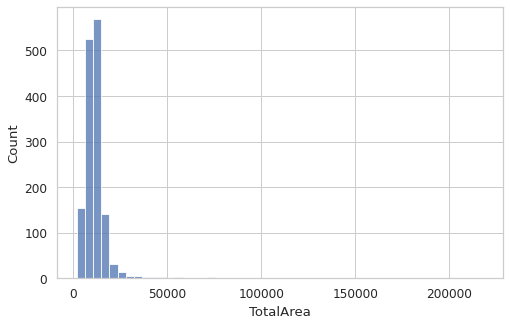

In [19]:
sns.histplot(house_final.TotalArea,bins=50)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


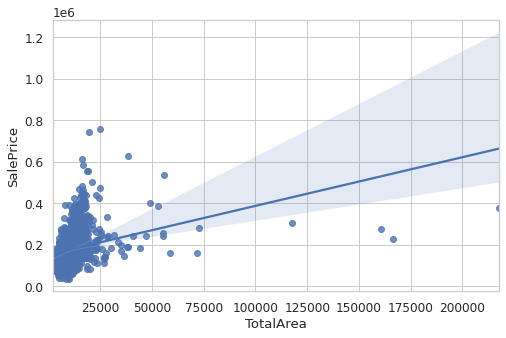

In [20]:
sns.regplot('TotalArea','SalePrice',data=house_final)

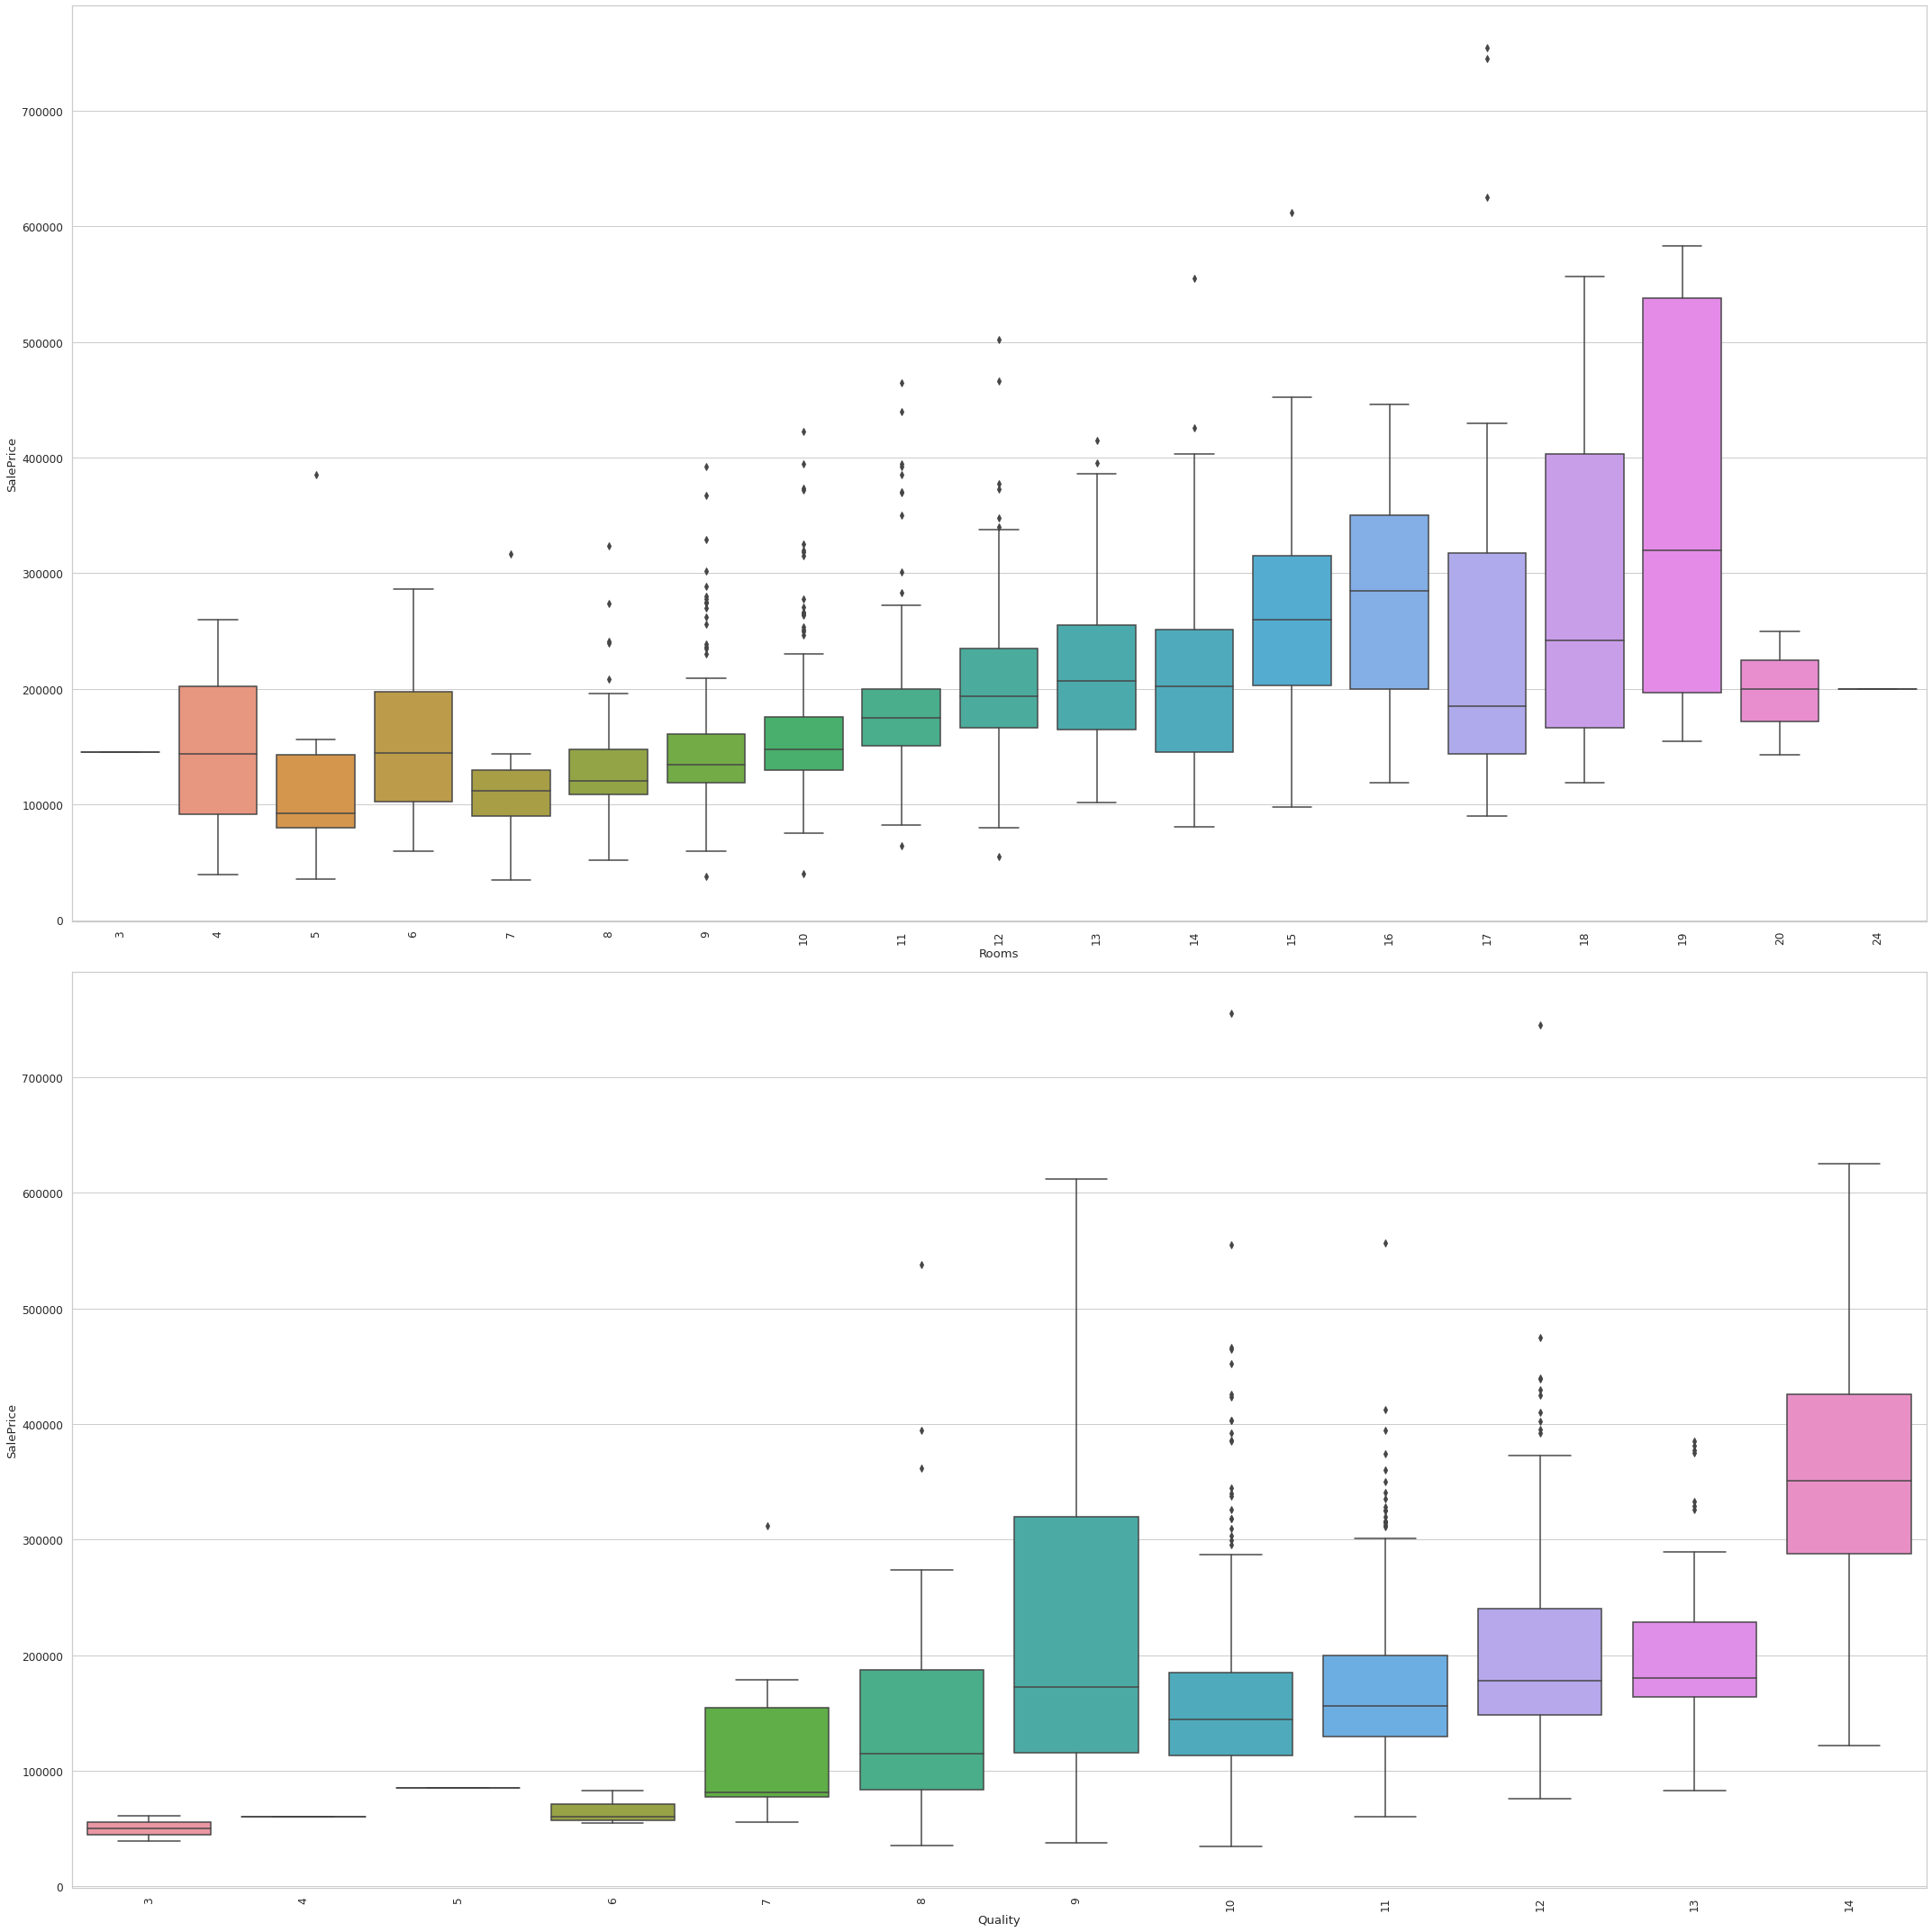

In [21]:
numerical1=['Rooms','Quality']
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
fig, ax = plt.subplots(2, 1, figsize=(30, 30))
for variable, subplot in zip(numerical1, ax.flatten()):
    sns.boxplot(x=variable,y='SalePrice',data=house_final,ax=subplot)
    #sm.qqplot(data_points, line ='45',ax=subplot) 
    for label in subplot.get_xticklabels():
        label.set_rotation(90)
fig.tight_layout() 


In [22]:
dic = house_final.groupby("YearBuilt").mean().LotArea.to_dict()
house_final["Year_Area_mean"] = house_final.YearBuilt.map(dic)
house_final

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,MSZoning,LotArea,Neighborhood,BldgType,HouseStyle,OverallQual,YearBuilt,ExterQual,TotalBsmtSF,HeatingQC,FullBath,BedroomAbvGr,KitchenQual,GarageType,TotRmsAbvGrd,GarageArea,PoolArea,SalePrice,TotalArea,Rooms,Quality,Year_Area_mean
0,3,8450,5,0,5,7,2003,2,856,0,2,3,2,1,8,548,0,208500,9854,13,11,9658.533333
1,3,9600,24,0,2,6,1976,3,1262,0,2,3,3,1,6,460,0,181500,11322,11,12,9195.909091
2,3,11250,5,0,5,7,2001,2,920,0,2,3,2,1,6,608,0,223500,12778,11,11,10407.500000
3,3,9550,6,0,5,7,1915,3,756,2,1,3,2,5,7,642,0,140000,10948,11,12,9134.900000
4,3,14260,15,0,5,8,2000,2,1145,0,2,4,2,1,9,836,0,250000,16241,15,12,8198.833333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,3,7917,8,0,5,6,1999,3,953,0,2,3,3,1,7,460,0,175000,9330,12,12,7747.240000
1456,3,13175,14,0,2,6,1978,3,1542,4,2,3,3,1,7,500,0,210000,15217,12,12,9717.687500
1457,3,9042,6,0,5,7,1941,0,1152,0,2,4,2,1,9,252,0,266500,10446,15,9,8626.400000
1458,3,9717,12,0,2,5,1950,3,1078,2,1,2,2,1,5,240,0,142125,11035,8,10,9165.250000


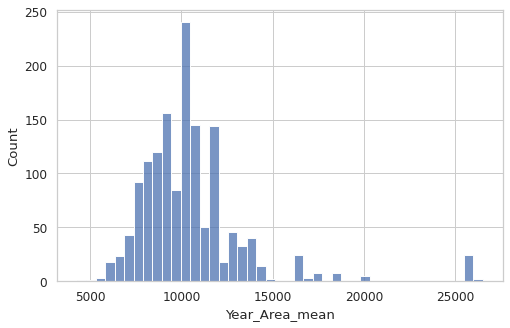

In [23]:
sns.histplot(x=house_final["Year_Area_mean"] )

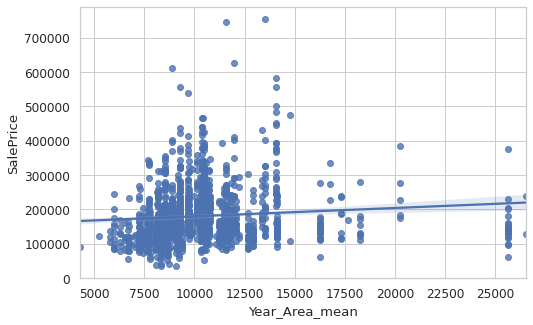

In [24]:
sns.regplot(x=house_final["Year_Area_mean"] ,y=house_final["SalePrice"] )

In [25]:
house_final["Year_Over_median"] = house_final.YearBuilt.map(house_final.groupby("YearBuilt").median().OverallQual.to_dict())
house_final

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,MSZoning,LotArea,Neighborhood,BldgType,HouseStyle,OverallQual,YearBuilt,ExterQual,TotalBsmtSF,HeatingQC,FullBath,BedroomAbvGr,KitchenQual,GarageType,TotRmsAbvGrd,GarageArea,PoolArea,SalePrice,TotalArea,Rooms,Quality,Year_Area_mean,Year_Over_median
0,3,8450,5,0,5,7,2003,2,856,0,2,3,2,1,8,548,0,208500,9854,13,11,9658.533333,7.0
1,3,9600,24,0,2,6,1976,3,1262,0,2,3,3,1,6,460,0,181500,11322,11,12,9195.909091,6.0
2,3,11250,5,0,5,7,2001,2,920,0,2,3,2,1,6,608,0,223500,12778,11,11,10407.500000,7.5
3,3,9550,6,0,5,7,1915,3,756,2,1,3,2,5,7,642,0,140000,10948,11,12,9134.900000,5.5
4,3,14260,15,0,5,8,2000,2,1145,0,2,4,2,1,9,836,0,250000,16241,15,12,8198.833333,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,3,7917,8,0,5,6,1999,3,953,0,2,3,3,1,7,460,0,175000,9330,12,12,7747.240000,7.0
1456,3,13175,14,0,2,6,1978,3,1542,4,2,3,3,1,7,500,0,210000,15217,12,12,9717.687500,6.0
1457,3,9042,6,0,5,7,1941,0,1152,0,2,4,2,1,9,252,0,266500,10446,15,9,8626.400000,5.0
1458,3,9717,12,0,2,5,1950,3,1078,2,1,2,2,1,5,240,0,142125,11035,8,10,9165.250000,5.0


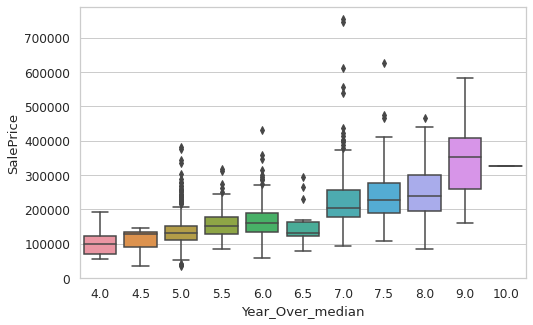

In [26]:
sns.boxplot(x=house_final["Year_Over_median"] ,y=house_final["SalePrice"] )

In [27]:
p=house_final.groupby(['YearBuilt']).median()
p.SalePrice.sort_values()


YearBuilt
1927     68500.0
1913     90350.0
1930     91000.0
1875     94000.0
1900    104513.0
          ...   
1989    275000.0
1892    291250.0
1893    325000.0
2008    335000.0
2010    394432.0
Name: SalePrice, Length: 112, dtype: float64

In [28]:
def four_map(map_dict):
  l = []
  for i in range(len(house_final)):
    a = house_final.Neighborhood[i]
    b = house_final.MSZoning[i]
    c = house_final.BldgType[i]
    d = house_final.HouseStyle[i]
    l.append(map_dict.get((a,b,c,d)))
  col = np.array(l)
  return col
d = house_final.groupby(["Neighborhood","MSZoning","BldgType","HouseStyle"]).mean().LotArea.to_dict()
house_final["four_Area_mean"] = four_map(d)
house_final

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


,MSZoning,LotArea,Neighborhood,BldgType,HouseStyle,OverallQual,YearBuilt,ExterQual,TotalBsmtSF,HeatingQC,FullBath,BedroomAbvGr,KitchenQual,GarageType,TotRmsAbvGrd,GarageArea,PoolArea,SalePrice,TotalArea,Rooms,Quality,Year_Area_mean,Year_Over_median,four_Area_mean
0,3,8450,5,0,5,7,2003,2,856,0,2,3,2,1,8,548,0,208500,9854,13,11,9658.533333,7.0,10313.245283
1,3,9600,24,0,2,6,1976,3,1262,0,2,3,3,1,6,460,0,181500,11322,11,12,9195.909091,6.0,18601.800000
2,3,11250,5,0,5,7,2001,2,920,0,2,3,2,1,6,608,0,223500,12778,11,11,10407.500000,7.5,10313.245283
3,3,9550,6,0,5,7,1915,3,756,2,1,3,2,5,7,642,0,140000,10948,11,12,9134.900000,5.5,11590.166667
4,3,14260,15,0,5,8,2000,2,1145,0,2,4,2,1,9,836,0,250000,16241,15,12,8198.833333,7.0,14717.909091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,3,7917,8,0,5,6,1999,3,953,0,2,3,3,1,7,460,0,175000,9330,12,12,7747.240000,7.0,11135.200000
1456,3,13175,14,0,2,6,1978,3,1542,4,2,3,3,1,7,500,0,210000,15217,12,12,9717.687500,6.0,11608.090909
1457,3,9042,6,0,5,7,1941,0,1152,0,2,4,2,1,9,252,0,266500,10446,15,9,8626.400000,5.0,11590.166667
1458,3,9717,12,0,2,5,1950,3,1078,2,1,2,2,1,5,240,0,142125,11035,8,10,9165.250000,5.0,10085.306122


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


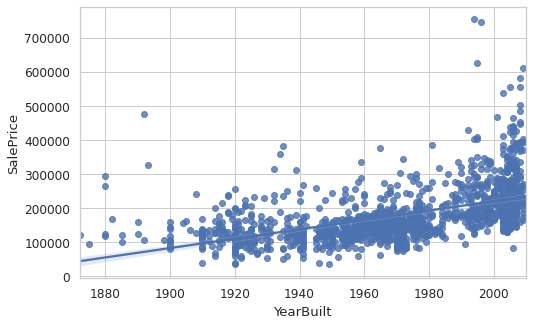

In [29]:
sns.regplot(house_final.YearBuilt,house_final.SalePrice)

In [30]:
house_final['four_Over_Median'] = four_map(house_final.groupby(["Neighborhood","MSZoning","BldgType","HouseStyle"]).median().OverallQual.to_dict())
house_final

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,MSZoning,LotArea,Neighborhood,BldgType,HouseStyle,OverallQual,YearBuilt,ExterQual,TotalBsmtSF,HeatingQC,FullBath,BedroomAbvGr,KitchenQual,GarageType,TotRmsAbvGrd,GarageArea,PoolArea,SalePrice,TotalArea,Rooms,Quality,Year_Area_mean,Year_Over_median,four_Area_mean,four_Over_Median
0,3,8450,5,0,5,7,2003,2,856,0,2,3,2,1,8,548,0,208500,9854,13,11,9658.533333,7.0,10313.245283,7.0
1,3,9600,24,0,2,6,1976,3,1262,0,2,3,3,1,6,460,0,181500,11322,11,12,9195.909091,6.0,18601.800000,6.0
2,3,11250,5,0,5,7,2001,2,920,0,2,3,2,1,6,608,0,223500,12778,11,11,10407.500000,7.5,10313.245283,7.0
3,3,9550,6,0,5,7,1915,3,756,2,1,3,2,5,7,642,0,140000,10948,11,12,9134.900000,5.5,11590.166667,7.0
4,3,14260,15,0,5,8,2000,2,1145,0,2,4,2,1,9,836,0,250000,16241,15,12,8198.833333,7.0,14717.909091,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,3,7917,8,0,5,6,1999,3,953,0,2,3,3,1,7,460,0,175000,9330,12,12,7747.240000,7.0,11135.200000,6.0
1456,3,13175,14,0,2,6,1978,3,1542,4,2,3,3,1,7,500,0,210000,15217,12,12,9717.687500,6.0,11608.090909,6.0
1457,3,9042,6,0,5,7,1941,0,1152,0,2,4,2,1,9,252,0,266500,10446,15,9,8626.400000,5.0,11590.166667,7.0
1458,3,9717,12,0,2,5,1950,3,1078,2,1,2,2,1,5,240,0,142125,11035,8,10,9165.250000,5.0,10085.306122,5.0


In [31]:
X = house_final.drop("SalePrice",axis =1)
y = house_final.SalePrice
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.model_selection import RepeatedKFold
X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size = 0.2, random_state = 0)
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(criterion= 'mae',n_estimators= 500,max_depth=28,n_jobs=-1,random_state=0)
rf.fit(X_train,y_train)
print(mean_absolute_error(y_train,rf.predict(X_train)))
print(mean_absolute_error(y_valid,rf.predict(X_valid)))
print(r2_score(y_train,rf.predict(X_train)))
print(r2_score(y_valid,rf.predict(X_valid)))

7591.630034246575
20339.46354109589
0.9764616616283552
0.8375250683935194


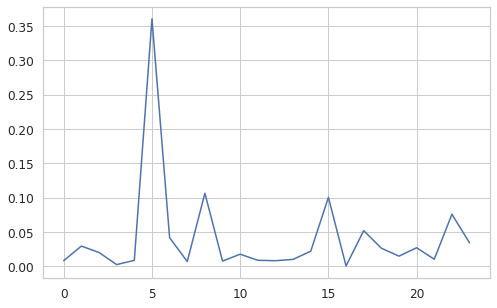

In [32]:
import matplotlib.pyplot as plt
plt.plot(rf.feature_importances_)

In [33]:
rf.feature_importances_

array([0.00820238, 0.02945052, 0.02009079, 0.00245928, 0.00866185,
       0.36064678, 0.0417577 , 0.00691286, 0.10640502, 0.00755369,
       0.01759844, 0.00874319, 0.0081373 , 0.01006445, 0.02200646,
       0.10045722, 0.00048948, 0.05190416, 0.02639027, 0.01476606,
       0.02702282, 0.01026538, 0.07585788, 0.03415603])

In [36]:
import pickle
filename = '/content/finalized.pkl'
pickle.dump(rf, open(filename, 'wb'))